## importing libraries

In [1]:
import pandas as pd
import numpy as np
import random
import re

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## importing train and test data

In [4]:
train=pd.read_csv('train.txt',sep=';',names=['Sentences','Emotion'])
test=pd.read_csv('test.txt',sep=';',names=['Sentences','Emotion'])

In [5]:
train

,Sentences,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


## data exploration & visualization

In [6]:
test.Emotion.unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [7]:
print(train.head(),'\n\n\n',test.head())

                                           Sentences  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger 


                                            Sentences  Emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [8]:
print("Training data : ",train.shape[0])
print("Testing data : ",test.shape[0])

Training data :  16000
Testing data :  2000


In [9]:
train.describe()

,Sentences,Emotion
count,16000,16000
unique,15969,6
top,i am not amazing or great at photography but i...,joy
freq,2,5362


In [10]:
test.describe()

,Sentences,Emotion
count,2000,2000
unique,2000,6
top,i am still feeling a bit dull from the loss of...,joy
freq,1,695


In [11]:
train.drop_duplicates(inplace=True)
train.dropna(inplace=True)

In [12]:
train.groupby('Emotion').count()

,Sentences
Emotion,
anger,2159
fear,1937
joy,5361
love,1304
sadness,4666
surprise,572


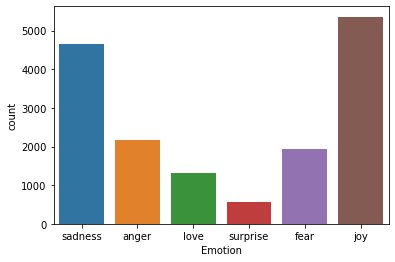

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Emotion', data=train)
plt.show()

In [14]:
test.groupby('Emotion').count()

,Sentences
Emotion,
anger,275
fear,224
joy,695
love,159
sadness,581
surprise,66


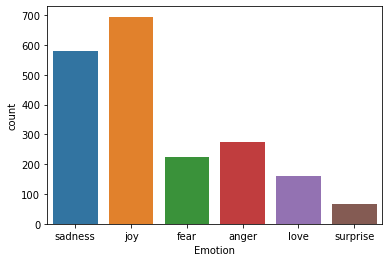

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Emotion', data=test)
plt.show()


## data cleaning

In [16]:
from nltk.corpus import stopwords
stoplist=stopwords.words('english')

from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

In [17]:
def expand(phrase):
    
    phrase = re.sub(r"wont", "will not", phrase)
    phrase = re.sub(r"wouldnt", "would not", phrase)
    phrase = re.sub(r"shouldnt", "should not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"cudnt", "could not", phrase)
    phrase = re.sub(r"cant", "can not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)

    
    phrase = re.sub(r"n\ t", " not", phrase)
    phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ s ", " is ", phrase) 
    phrase = re.sub(r"\ d ", " would ", phrase)
    phrase = re.sub(r"\ ll ", " will ", phrase)
    phrase = re.sub(r"\dunno", "do not ", phrase)
    phrase = re.sub(r"ive ", "i have ", phrase)
    phrase = re.sub(r"im ", "i am ", phrase)
    phrase = re.sub(r"i m ", "i am ", phrase)
    phrase = re.sub(r" w ", " with ", phrase)

    return phrase

In [18]:
def process(sentences):
    list=[]
    for i in range(len(sentences)):

        # Removing all characters except alphabets
        temp=re.sub('[^a-zA-Z]',' ',sentences[i])
        
        #Expanding the word ( like wont into will not )
        temp=expand(temp)

        #lowering all characters
        temp=temp.lower()
        #splitting the sentences into words
        temp=temp.split()

        # lamaetizing the only words which are not present in stopwords
        temp=[lemmatizer.lemmatize(word) for word in temp if word not in set(stoplist)]
    
        # joining the words into sentences
        temp=' '.join(temp)

        # Appending the new sentences into the new list which will be forward proceeded
        list.append(temp)
    return list

In [19]:
train['Sentences']=process(np.array(train['Sentences']))
test['Sentences']=process(np.array(test['Sentences']))

In [20]:
train

,Sentences,Emotion
0,feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still no...,love
4,feeling grouchy,anger
...,...,...
15995,brief time nothe beanbag said anna feel like b...,sadness
15996,turning feel pathetic still waiting table subb...,sadness
15997,feel strong good overall,joy
15998,feel like rude comment glad,anger


In [21]:
test

,Sentences,Emotion
0,feeling rather rotten ambitious right,sadness
1,updating blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,left bouquet red yellow tulip arm feeling slig...,joy
4,feeling little vain one,sadness
...,...,...
1995,keep feeling like someone unkind wrong ca noth...,anger
1996,feeling little cranky negati doctor appointment,anger
1997,feel useful people give great feeling achievement,joy
1998,feeling comfortable derby feel though start st...,joy


In [21]:
#encoding emotions into numerical values

In [22]:
#emotion=np.array(train['Emotion'].unique())
#dict={}
#for i,e in enumerate(emotion):
    #dict[e]=i

#dict

In [23]:
#train['Emotion']=train['Emotion'].replace(dict)
#test['Emotion']=test['Emotion'].replace(dict)

In [22]:
train.head()

,Sentences,Emotion
0,feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still no...,love
4,feeling grouchy,anger


## word embeddings- TFIDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=8000)
train_data=tfidf.fit_transform(train['Sentences'])
test_data=tfidf.transform(test['Sentences'])

In [24]:
train_label=train.Emotion.values
test_label=test.Emotion.values

## logistic regression and SVM 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score

clf=LogisticRegression(max_iter=100000)
clf.fit(train_data,train_label)
pred=clf.predict(test_data)
print('Accuracy : ',accuracy_score(test_label,pred))
print('\nConfusion Matrix : \n',confusion_matrix(test_label,pred))
print('\n\nClassification Report : \n',classification_report(test_label,pred, digits=2))

Accuracy :  0.868

Confusion Matrix : 
 [[229   5  18   1  22   0]
 [  9 176  14   1  23   1]
 [  4   3 661  18   7   2]
 [  3   0  49  98   9   0]
 [ 14   4  22   1 539   1]
 [  2  14  14   0   3  33]]


Classification Report : 
               precision    recall  f1-score   support

       anger       0.88      0.83      0.85       275
        fear       0.87      0.79      0.83       224
         joy       0.85      0.95      0.90       695
        love       0.82      0.62      0.71       159
     sadness       0.89      0.93      0.91       581
    surprise       0.89      0.50      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=2, probability=True)
svm.fit(train_data, train_label)
pred = svm.predict(test_data)
print('Accuracy : ',accuracy_score(test_label,pred))
print('\nConfusion Matrix : \n',confusion_matrix(test_label,pred))
print('\n\nClassification Report : \n',classification_report(test_label,pred, digits=2))

Accuracy :  0.886

Confusion Matrix : 
 [[244   5   8   2  15   1]
 [  9 192   3   0  12   8]
 [  7   7 638  31   5   7]
 [  1   0  32 122   3   1]
 [ 17   9  17   1 533   4]
 [  1  11   9   0   2  43]]


Classification Report : 
               precision    recall  f1-score   support

       anger       0.87      0.89      0.88       275
        fear       0.86      0.86      0.86       224
         joy       0.90      0.92      0.91       695
        love       0.78      0.77      0.77       159
     sadness       0.94      0.92      0.93       581
    surprise       0.67      0.65      0.66        66

    accuracy                           0.89      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.89      0.89      0.89      2000



In [29]:
########

## taking user input 

In [32]:
# Take input from user
input_sentence = input("Enter a sentence: ")

# Preprocess the input sentence
processed_sentence = process([input_sentence])[0]

# Vectorize the processed sentence using the same TfidfVectorizer object used for training
input_data = tfidf.transform([processed_sentence])

# Predict the emotion using logistic regression
lr_pred = clf.predict(input_data)[0]
print("Predicted emotion using logistic regression: ", lr_pred)

# Predict the emotion using SVM
svm_pred = svm.predict(input_data)[0]
print("Predicted emotion using SVM: ", svm_pred)

Enter a sentence: what a rude guy
Predicted emotion using logistic regression:  anger
Predicted emotion using SVM:  anger


<AxesSubplot:title={'center':'Confusion Matrix'}>

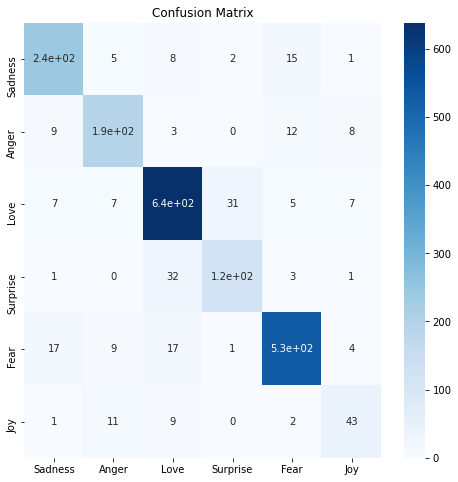

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
label=['Sadness','Anger','Love','Surprise','Fear','Joy']
matrix=confusion_matrix(test_label,pred)

matrix=pd.DataFrame(matrix,columns=label,index=label)
fig, ax = plt.subplots(figsize=(8,8))
ax.set(title='Confusion Matrix')

sns.heatmap(matrix,cmap='Blues',annot=True,ax=ax)